<a href="https://colab.research.google.com/github/abdelrahman-walid/yougotsoftwared/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:abdelrahman walid

ID:55-24652

Tutorial:3

---

Name:amr khaled helal

ID:55-5240

Tutorial:3

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [100]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,504040,black,gray,the hertz corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
5,2014,Kia,Optima,LX,sedan,automatic,5xxgm4a70eg329048,co,4.6,83860,black,gray,"kia motors america, inc",15500,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
10,2015,Jeep,Wrangler,Freedom Edition,suv,automatic,1c4gjwag2fl564931,mo,5.0,36150,blue,black,santander consumer,27500,Wed Jun 10 2015 03:30:00 GMT-0700 (PDT)
17,2007,Chrysler,PT Cruiser,Touring,wagon,automatic,3a4fy58b57t631081,nj,1.0,774680,black,gray,purple heart services inc,800,Thu Jun 11 2015 11:00:00 GMT-0700 (PDT)
20,2008,Honda,Odyssey,Touring,van,automatic,5fnrl38938b007721,nc,3.5,1378520,white,beige,rick hendrick chevrolet buick gmc,8900,Mon Feb 16 2015 01:30:00 GMT-0800 (PST)


In [32]:
df.describe()

,year,condition,odometer,sellingprice,Selling_Price
count,46578.000000,46578.000000,4.657800e+04,46578.000000,46578.000000
mean,2010.203401,3.424265,6.685064e+05,13669.705204,13669.705204
std,3.831316,0.944009,5.186840e+05,9632.257208,9632.257208
min,1990.000000,1.000000,1.000000e+01,150.000000,150.000000
25%,2008.000000,2.700000,2.818500e+05,7100.000000,7100.000000
50%,2012.000000,3.600000,5.119300e+05,12200.000000,12200.000000
75%,2013.000000,4.200000,9.714650e+05,18200.000000,18200.000000
max,2015.000000,5.000000,9.999990e+06,230000.000000,230000.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           46578 non-null  int64  
 1   make           46578 non-null  object 
 2   model          46578 non-null  object 
 3   trim           46578 non-null  object 
 4   body           46578 non-null  object 
 5   transmission   46578 non-null  object 
 6   vin            46578 non-null  object 
 7   state          46578 non-null  object 
 8   condition      46578 non-null  float64
 9   odometer       46578 non-null  int64  
 10  color          46578 non-null  object 
 11  interior       46578 non-null  object 
 12  seller         46578 non-null  object 
 13  sellingprice   46578 non-null  int64  
 14  saledate       46578 non-null  object 
 15  Selling_Price  46578 non-null  int64  
dtypes: float64(1), int64(4), object(11)
memory usage: 5.7+ MB


In [98]:
print(df.body.unique())


['sedan' 'suv' 'wagon' 'van' 'coupe' 'convertible' 'hatchback'
 'pickup truck' 'minivan']


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [48]:
# dealing with numeric coloumns
df['sellingprice'] = df['sellingprice'].replace('[\$,]', '', regex=True)
df['sellingprice'] = pd.to_numeric(df['sellingprice'], errors='coerce')
df = df.dropna(subset=['sellingprice'])
mean_prices = df.groupby('transmission')['sellingprice'].mean()
df['odometer'] = df['odometer'].replace('[\.mi,]', '', regex=True)
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')


In [37]:
# normalizing other coloumns
df['make'] = df['make'].str.lower().str.strip()
df['model'] = df['model'].str.lower().str.strip()
df['transmission'] = df['transmission'].str.lower().str.strip()
df['body'] = df['body'].str.lower().str.strip()
df['color'] = df['color'].str.lower().str.strip()
df['interior'] = df['interior'].str.lower().str.strip()
df['seller'] = df['seller'].str.lower().str.strip()

In [95]:
#reducing body type categories
def map_body_type(body):
    if 'sedan' in body:
        return 'sedan'
    elif 'coupe' in body or 'koup' in body:
        return 'coupe'
    elif 'convertible' in body:
        return 'convertible'
    elif 'hatchback' in body:
        return 'hatchback'
    elif 'suv' in body:
        return 'suv'
    elif 'minivan' in body:
        return 'minivan'
    elif 'wagon' in body:
        return 'wagon'
    elif ('crew cab' in body or 'double cab' in body or 'regular cab' in body or
          'extended cab' in body or 'supercab' in body or 'king cab' in body or
          'quad cab' in body or 'crewmax cab' in body or 'club cab' in body or
          'access cab' in body or 'xtracab' in body or 'mega cab' in body):
        return 'pickup truck'
    elif 'van' in body:
        return 'van'
    else:
        return 'other'

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

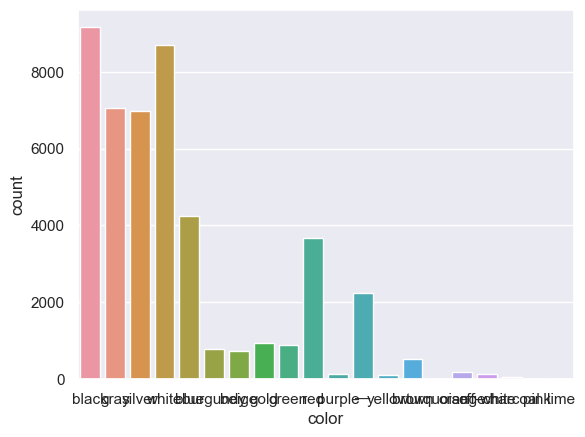

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

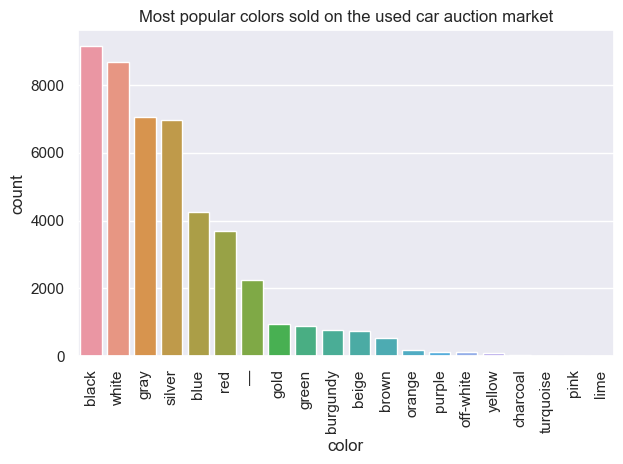

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

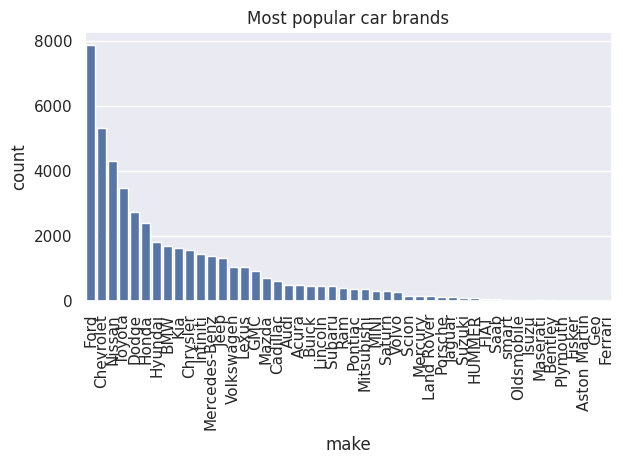

In [28]:
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: Ford, Chevrolet, Nissan


**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

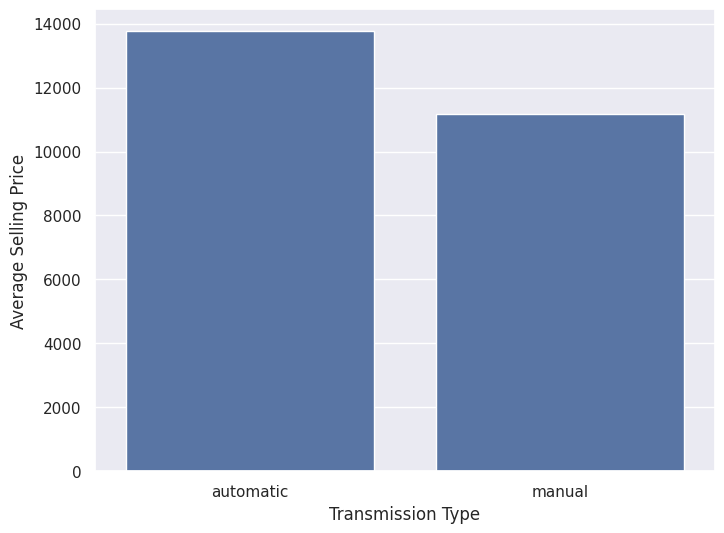

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x=mean_prices.index, y=mean_prices.values)
plt.xlabel('Transmission Type')
plt.ylabel('Average Selling Price')
plt.show()

**Answer for Q2**: Yes, automatic cars on average have a higher selling price.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

<Figure size 2000x600 with 0 Axes>

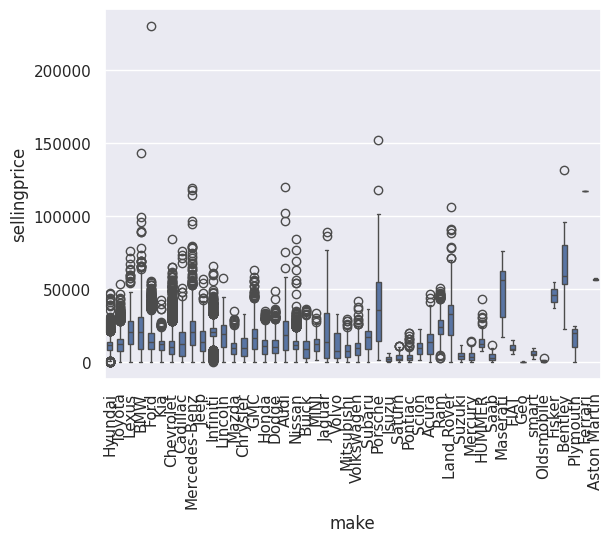

<Figure size 2000x600 with 0 Axes>

In [81]:
sns.boxplot(x='make', y='sellingprice', data=df, width=0.5);
plt.xticks(rotation=90)
plt.figure(figsize=(20, 6))


[link text](https://)**Answer for Q3**: The car makers with the widest distribution are Porche and Maserati, The ones with the most expensive selling price are Porche and Bentley

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

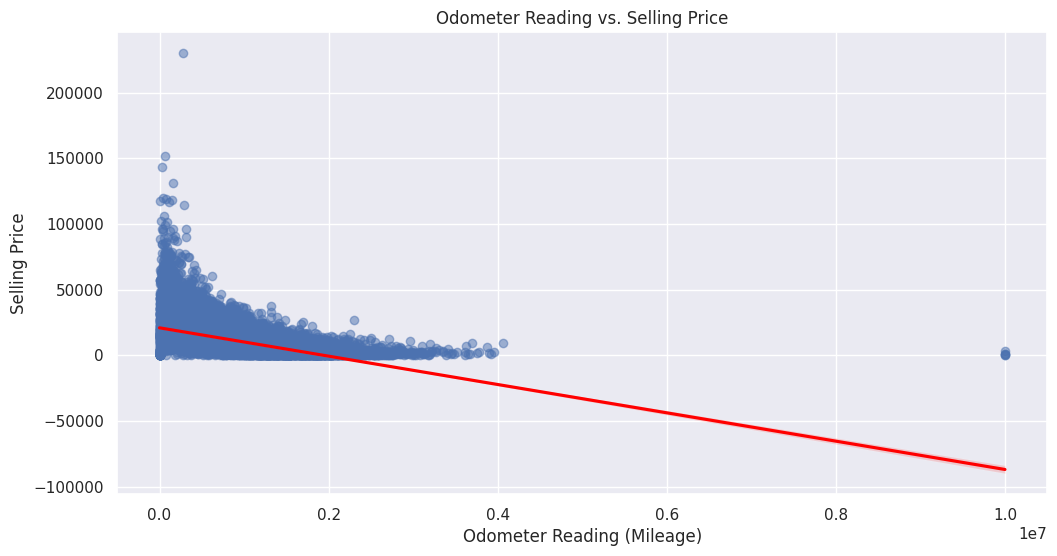

Pearson correlation coefficient: -0.5808998783726375


In [89]:
sns.regplot(data=df_encoded, x='odometer', y='sellingprice')
plt.xlabel('odometer')
plt.ylabel('sellingprice')
plt.show()
correlation = df_encoded['odometer'].corr(df_encoded['sellingprice'])
print(f"Pearson Correlation Coefficient: {correlation}")

**Answer for Q4**: There's definetly a negative corellation, relatively not the strongest but it exists.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

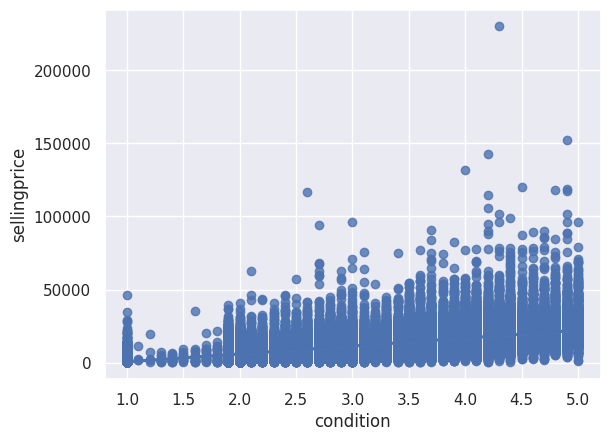

Pearson Correlation Coefficient: 0.5291410183967024


In [90]:
sns.regplot(data=df_encoded, x='condition', y='sellingprice')
plt.xlabel('condition')
plt.ylabel('sellingprice')
plt.show()
correlation = df_encoded['condition'].corr(df_encoded['sellingprice'])
print(f"Pearson Correlation Coefficient: {correlation}")

**Answer for Q5**: They're postively corellated, with a pearson coefficient of 0.53 the relation exists but relatively not very strong

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

In [101]:
average_prices = df.groupby('body')['sellingprice'].mean().reset_index()
average_prices_sorted = average_prices.sort_values(by='sellingprice', ascending=False)
print(average_prices_sorted)

           body  sellingprice
0   convertible  20902.896341
1         coupe  18975.877193
4  pickup truck  18019.137353
6           suv  16634.843029
5         sedan  12263.130310
3       minivan  12015.862903
7           van  11409.688689
2     hatchback  10458.329177
8         wagon   9934.204545


[link text](https://)**Answer for Q6**: the most expensive body type is convertible and the least is wagon

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [97]:
df['body'] = df['body'].apply(map_body_type)

df = df[df['body'] != 'other']

In [42]:
#choosing the coloumns for the model
modeling_columns = ['make', 'model', 'transmission', 'odometer', 'body', 'sellingprice']
df_model = df[modeling_columns].copy()
df_model = df_model.dropna()

In [107]:
#ensuring all used coloumns are numeric
#label_encoder = LabelEncoder()
#df_encoded = df.copy()
#df_encoded['make'] = label_encoder.fit_transform(df_encoded['make'])
#df_encoded['transmission'] = label_encoder.fit_transform(df_encoded['transmission'])
#df_encoded['body'] = label_encoder.fit_transform(df_encoded['body'])
#df_encoded['model'] = label_encoder.fit_transform(df_encoded['model'])

In [51]:
df_encoded.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,18,532,GLS,63,0,5npeb4acxdh702805,ma,3.9,504040,black,gray,the hertz corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,44,17,SR5,31,0,jtezu5jr2e5064567,fl,4.9,178460,gray,—,award auto sales and leasing inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,25,287,Base,32,0,jthbf5c24c5168599,fl,4.1,211220,silver,black,lexus financial services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,3,607,4.4i,31,0,5uxfb33562lh33864,fl,1.9,1453030,black,black,peddle llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,13,161,E-250,12,0,1ftne2ew0eda31832,wa,4.9,67140,white,gray,u-haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Modelling

_Apply the linear regression model below._

In [108]:
features = ['make', 'model', 'transmission', 'odometer', 'body']
X = df_encoded[features]
y = df_encoded['sellingprice']

label_encoder = LabelEncoder()
X['transmission'] = label_encoder.fit_transform(X['transmission'])
X['body'] = label_encoder.fit_transform(X['body'])
X['make'] = label_encoder.fit_transform(X['make'])
X['model'] = label_encoder.fit_transform(X['model'])

<ipython-input-108-26f7467ba681>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['transmission'] = label_encoder.fit_transform(X['transmission'])
<ipython-input-108-26f7467ba681>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['body'] = label_encoder.fit_transform(X['body'])
<ipython-input-108-26f7467ba681>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train);

## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [114]:
lin_reg.score(X_test, y_test)

0.35026162080775014

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.